<a href="https://colab.research.google.com/github/shubham2710/Image-quality-detection/blob/main/Image_Quality_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 61kB 2.9MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=f81acfe24a450ad990a046467f8fb0643a7e9f8d42cd9704dbcdb8569e4a4164
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=9e14cbc812dde4532de03bddc042299a4edc4a62254607ac2daa85491fca3b6e
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget http://mklab.iti.gr/files/imageblur/CERTH_ImageBlurDataset.zip

--2020-10-02 05:43:01--  http://mklab.iti.gr/files/imageblur/CERTH_ImageBlurDataset.zip
Resolving mklab.iti.gr (mklab.iti.gr)... 160.40.50.223
Connecting to mklab.iti.gr (mklab.iti.gr)|160.40.50.223|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mklab.iti.gr/files/imageblur/CERTH_ImageBlurDataset.zip [following]
--2020-10-02 05:43:02--  https://mklab.iti.gr/files/imageblur/CERTH_ImageBlurDataset.zip
Connecting to mklab.iti.gr (mklab.iti.gr)|160.40.50.223|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4022804823 (3.7G) [application/zip]
Saving to: ‘CERTH_ImageBlurDataset.zip’

CERTH_ImageBlurData 100%[===================>]   3.75G  6.68MB/s    in 7m 34s  

2020-10-02 05:50:37 (8.46 MB/s) - ‘CERTH_ImageBlurDataset.zip’ saved [4022804823/4022804823]



In [ ]:
!unzip CERTH_ImageBlurDataset.zip


Archive:  CERTH_ImageBlurDataset.zip
   creating: CERTH_ImageBlurDataset/
   creating: CERTH_ImageBlurDataset/EvaluationSet/
   creating: CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/
  inflating: CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/DiskR10_1.jpg  
  inflating: CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/DiskR10_10.jpg  
  inflating: CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/DiskR10_11.jpg  
  inflating: CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/DiskR10_12.jpg  
  inflating: CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/DiskR10_13.jpg  
  inflating: CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/DiskR10_14.jpg  
  inflating: CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/DiskR10_15.jpg  
  inflating: CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/DiskR10_16.jpg  
  inflating: CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/DiskR10_17.jpg  
  inflating: CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/DiskR10

In [3]:
import numpy as np
import pandas as pd
import os
import pickle


from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Flatten, Dense, Activation, Dropout
from keras.preprocessing import image
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD

# Train Data

In [194]:
X_train = []
y_train = []

input_size = (128,128)

In [195]:
folderpath = 'CERTH_ImageBlurDataset/TrainingSet/Undistorted/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size = input_size)
        X_train.append((1/255)*np.asarray(img))
        y_train.append(0)
    else:
        print(filename, 'not a pic')
print("Trainset: Undistorted loaded...")

Trainset: Undistorted loaded...


In [196]:
folderpath = 'CERTH_ImageBlurDataset/TrainingSet/Artificially-Blurred/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=input_size)
        X_train.append((1/255)*np.asarray(img))
        y_train.append(1)
    else:
        print(filename, 'not a pic')
print("Trainset: Artificially Blurred loaded...")

Trainset: Artificially Blurred loaded...


In [197]:
folderpath = 'CERTH_ImageBlurDataset/TrainingSet/Naturally-Blurred/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=input_size)
        X_train.append((1/255)*np.asarray(img))
        y_train.append(1)
    else:
        print(filename, 'not a pic')
print("Trainset: Naturally Blurred loaded...")

Trainset: Naturally Blurred loaded...


In [198]:
# Pickle the train files

with open('X_train.pkl', 'wb') as picklefile:
    pickle.dump(X_train, picklefile)


with open('y_train.pkl', 'wb') as picklefile:
    pickle.dump(y_train, picklefile)

# Test Data

In [199]:
X_test = []
y_test = []

In [200]:
dgbset = pd.read_excel('CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet.xlsx')
nbset = pd.read_excel('CERTH_ImageBlurDataset/EvaluationSet/NaturalBlurSet.xlsx')

In [201]:
dgbset['MyDigital Blur'] = dgbset['MyDigital Blur'].apply(lambda x : x.strip())
dgbset = dgbset.rename(index=str, columns={"Unnamed: 1": "Blur Label"})

In [202]:
nbset['Image Name'] = nbset['Image Name'].apply(lambda x : x.strip())


In [203]:
folderpath = 'CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=input_size)
        X_test.append((1/255)*np.asarray(img))
        blur = dgbset[dgbset['MyDigital Blur'] == filename].iloc[0]['Blur Label']
        if blur == 1:
            y_test.append(1)
        else:
            y_test.append(0)
    else:
        print(filename, 'not a pic')
print("Testset: Artificially Blurred loaded...")

Testset: Artificially Blurred loaded...


In [204]:
folderpath = 'CERTH_ImageBlurDataset/EvaluationSet/NaturalBlurSet/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=input_size)
        X_test.append((1/255)*np.asarray(img))
        blur = nbset[nbset['Image Name'] == filename.split('.')[0]].iloc[0]['Blur Label']
        if blur == 1:
            y_test.append(1)
        else:
            y_test.append(0)
    else:
        print(filename, 'not a pic')

print("Trainset: Naturally Blurred loaded...")

Trainset: Naturally Blurred loaded...


In [205]:
with open('X_test.pkl', 'wb') as picklefile:
    pickle.dump(X_test, picklefile)


with open('y_test.pkl', 'wb') as picklefile:
    pickle.dump(y_test, picklefile)

# CNN MODEL

In [206]:

with open('X_train.pkl', 'rb') as picklefile:
    X_train = pickle.load( picklefile)


with open('y_train.pkl', 'rb') as picklefile:
    y_train = pickle.load( picklefile)


with open('X_test.pkl', 'rb') as picklefile:
    X_test = pickle.load(picklefile)


with open('y_test.pkl', 'rb') as picklefile:
    y_test = pickle.load(picklefile)

In [207]:
model = Sequential()


In [208]:
# conv filters of 5x5 each

# Layer 1
model.add(Convolution2D(32, (5, 5), input_shape=(input_size[0], input_size[1], 3), padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2                   
model.add(Convolution2D(64, (5, 5), padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Layer 3
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))

# Layer 4

model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))



model.add(Dense(2))
model.add(Activation("softmax"))
print(model.summary())

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 128, 128, 32)      2432      
_________________________________________________________________
activation_50 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 64)        51264     
_________________________________________________________________
activation_51 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 65536)           

In [209]:
traindata = np.stack(X_train)
testdata = np.stack(X_test)
trainlabel = to_categorical(y_train)
testlabel = to_categorical(y_test)


In [216]:
epochs = 12
for i in range(epochs):
  model.fit(traindata, trainlabel, batch_size=128, epochs=1, verbose=1)
  print("Model training complete...")
  (loss, accuracy) = model.evaluate(testdata, testlabel, batch_size = 128, verbose = 1)
  model.save('/content/model_' + str(i) + '.h5')
  print("test -accuracy: {:.2f}%".format(accuracy * 100))

8/8 [==============================] - 0s 42ms/step - loss: 0.3897 - accuracy: 0.8360
Model training complete...
12/12 [==============================] - 0s 19ms/step - loss: 0.8282 - accuracy: 0.5831
test -accuracy: 58.31%
8/8 [==============================] - 0s 41ms/step - loss: 0.3589 - accuracy: 0.8490
Model training complete...
12/12 [==============================] - 0s 17ms/step - loss: 0.6261 - accuracy: 0.7088
test -accuracy: 70.88%
8/8 [==============================] - 0s 41ms/step - loss: 0.2630 - accuracy: 0.9020
Model training complete...
12/12 [==============================] - 0s 19ms/step - loss: 0.5270 - accuracy: 0.7980
test -accuracy: 79.80%
8/8 [==============================] - 0s 42ms/step - loss: 0.2323 - accuracy: 0.9110
Model training complete...
12/12 [==============================] - 0s 18ms/step - loss: 0.5980 - accuracy: 0.7264
test -accuracy: 72.64%
8/8 [==============================] - 0s 43ms/step - loss: 0.2312 - accuracy: 0.9190
Model training com

In [211]:
print(" complete...")


 complete...


In [212]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

In [232]:
model = load_model('model_2.h5') # 79% Accurate


TESTING OUR MODEL


NOT BLURRED


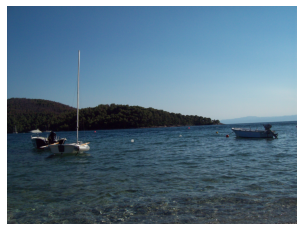

NOT BLURRED


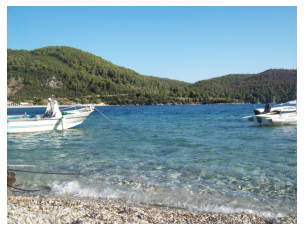

BLURRED


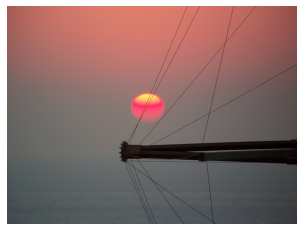

BLURRED


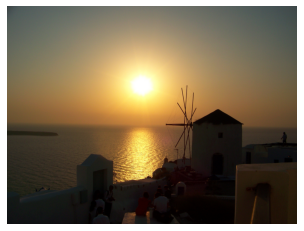

BLURRED


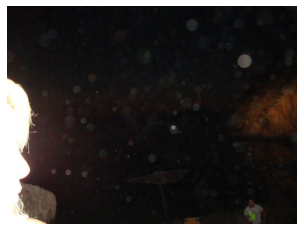

BLURRED


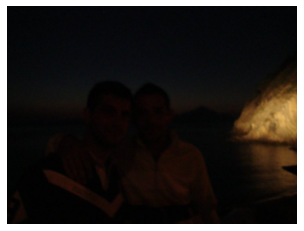

BLURRED


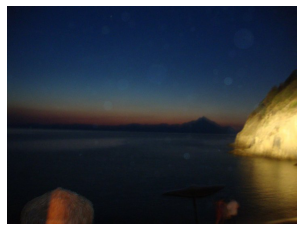

BLURRED


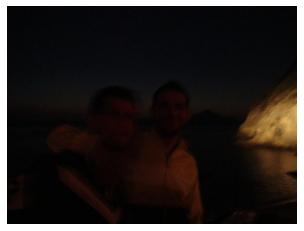

In [254]:
folderpath = '/content/drive/My Drive/sample/'

import matplotlib.pyplot as plt

# load image arrays
count = 0
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=input_size)
        img = ((1/255)*np.asarray(img)).reshape(((1,128,128,3)))
        res = (model.predict(img))
        i = plt.imread(imagepath)

        k = (res[0][1])
        if (k) > 0.5:
          print('BLURRED')

        else:
          print("NOT BLURRED")
        plt.imshow(i)
        plt.axis("off")
        plt.show()

 
    count+=1
    if count == 10:
      break

